In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
# from sklearn.decomposition import PCA

import os
%matplotlib inline

# Record of each Type

## Type A

exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
filenames = os.listdir(exp_folder)
Mean = 10
contrast_list = [0.1,0.2,0.3]
fileIndex = [25,26,30]
cn = 50

## Type E

exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
filenames = os.listdir(exp_folder)
Mean = 10
contrast_list = [0.05,0.1,0.15,0.2,0.3]
fileIndex = np.arange(9,14)
cn = 30

In [2]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
filenames = os.listdir(exp_folder)

In [3]:
fileIndex = [10,13]
cn = 30

# PCA of all (across different contrast) spike triggered

In [4]:
import warnings
warnings.simplefilter('ignore')

dt = 0.05
window = [-1,0] # second
stepshift = np.arange(window[0]/dt, window[1]/dt+1, dtype = int)

scontrastling_rate = 20000
STcollection_file = []
for fi in fileIndex:
    filename = filenames[fi]
    annots = loadmat(exp_folder+filename, squeeze_me = True)
   
    TicTocer = annots['a_data'][1]
    startPoint = np.where(TicTocer>38000)[0][0]
    endPoint = np.where(TicTocer>38000)[0][-1]
    x = annots['a_data'][0, startPoint:endPoint+1]
    x = np.convolve(x, np.ones(int(scontrastling_rate*dt*0.5))/int(scontrastling_rate*dt*0.5), 'same')
    x = x[int(scontrastling_rate*dt*0.5)::int(scontrastling_rate*dt)]
    x = x.astype(float)
    # x = ((x-np.mean(x))/np.std(x)*contrast + 1) *Mean
    x = (x-np.mean(x))/np.std(x)
    tEdge = np.arange(len(x)+1)*dt

    Spike = annots['Spikes'][cn-1]
    Spike = Spike[np.where(Spike>startPoint/scontrastling_rate)[0][0]:np.where(Spike<endPoint/scontrastling_rate)[0][-1]]-startPoint/scontrastling_rate
    rstate, _ = np.histogram(Spike, tEdge)
    
    STcollection = np.zeros((1,len(stepshift)))
    for i in np.arange(-stepshift[0],len(rstate)-stepshift[-1]):
        for spike in range(rstate[i]):
            STcollection = np.vstack((STcollection, x[i+stepshift]))
    
    STcollection_file.append(STcollection[1:,])

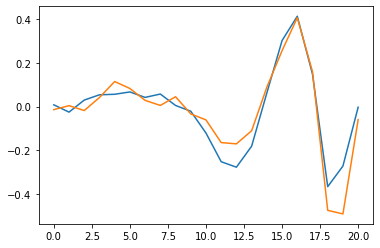

In [5]:
STA_file = [np.mean(STcollection, axis=0) for STcollection in STcollection_file]
for STA in STA_file:
    plt.plot(STA)

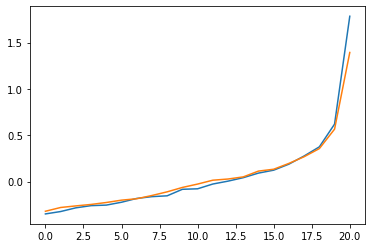

In [6]:
for STcollection in STcollection_file:
    centerSTcollection = STcollection-np.mean(STcollection, axis=0)

    STC = np.matmul(centerSTcollection.T, centerSTcollection) / centerSTcollection.shape[0]
    deltaC = STC - np.identity(len(STC))
    w,v = np.linalg.eig(deltaC)
    plt.plot(np.sort(w))

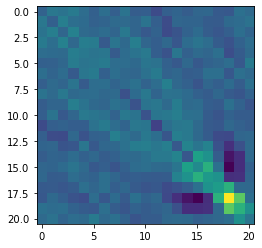

In [7]:
plt.imshow(deltaC)